In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
a=pd.read_csv("/content/Wine.csv")
print(a)
X=a.drop("Customer_Segment",axis=1)
y=a["Customer_Segment"]
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# Train an SVM classifier
svm_original = SVC()
svm_original.fit(X_train, y_train)

# Evaluate the accuracy of the SVM classifier
y_pred_original = svm_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Accuracy before PCA:", accuracy_original)

# PCA to reduce the dimension
n_components = 2

pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
print(X_train_reduced.shape)
print(X_test_reduced.shape)

# Train an SVM classifier on the reduced data
svm_reduced = SVC()
svm_reduced.fit(X_train_reduced, y_train)

#  Evaluate the accuracy of the SVM classifier on the reduced testing data
y_pred_reduced = svm_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print("Accuracy after PCA:", accuracy_reduced)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

Logistic Regression Accuracy: 0.7142857142857143
SVM Accuracy: 0.7142857142857143


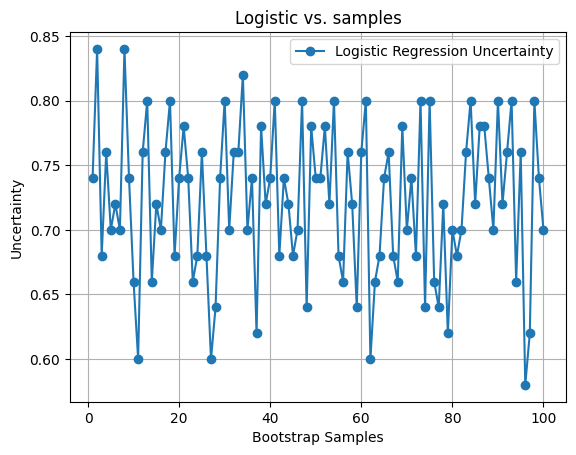

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt



data = pd.read_csv('/content/breast_cancer_survival (1).csv')



drop_columns = ["Gender", "Histology", "ER status", "PR status", "Surgery_type", "Date_of_Surgery", "Date_of_Last_Visit"]
data = data.drop(columns=drop_columns)



data['modified_Tumour_Stage'] = data['Tumour_Stage'].map({'I': 1, 'II': 2}).fillna(3)
data['mod_Patient_Status'] = (data['Patient_Status'] == 'Alive').astype(int)
data['modified_HER2_status'] = (data['HER2 status'] == 'Positive').astype(int)



X = data.drop(['Tumour_Stage', 'Patient_Status', 'mod_Patient_Status', 'HER2 status'], axis=1)
y = data['mod_Patient_Status']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)



logistic_model = LogisticRegression().fit(X_train, y_train)
svm_model = SVC().fit(X_train, y_train)



accuracy_logistic = accuracy_score(y_test, logistic_model.predict(X_test))
accuracy_svm = accuracy_score(y_test, svm_model.predict(X_test))



print("Logistic Regression Accuracy:", accuracy_logistic)
print("SVM Accuracy:", accuracy_svm)


n_bootstraps = 100
sample_sizes = range(1, 51)


logistic_uncertainty = []
svm_uncertainty = []

for size in sample_sizes:
    logistic_bootstrap_uncertainty = []
    svm_bootstrap_uncertainty = []
    for _ in range(n_bootstraps):

        bootstrap_indices = np.random.choice(len(y_test), size, replace=True)
        X_bootstrap = X_test.iloc[bootstrap_indices]
        y_bootstrap = y_test.iloc[bootstrap_indices]


        logistic_pred = logistic_model.predict(X_bootstrap)
        svm_pred = svm_model.predict(X_bootstrap)


        logistic_accuracy = accuracy_score(y_bootstrap, logistic_pred)
        svm_accuracy = accuracy_score(y_bootstrap, svm_pred)

        logistic_bootstrap_uncertainty.append(logistic_accuracy)
        svm_bootstrap_uncertainty.append(svm_accuracy)

sample_indices = range(1, n_bootstraps + 1)


plt.plot(sample_indices, logistic_bootstrap_uncertainty, label='Logistic Regression Uncertainty', marker='o')

plt.xlabel('Bootstrap Samples')
plt.ylabel('Uncertainty')
plt.title('Logistic vs. samples')
plt.legend()
plt.grid(True)

plt.show()